# Predicting COVID-19 Hospitalizations

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn
import filterpy
from pandas import DataFrame
from statsmodels.graphics.tsaplots import plot_pacf
import warnings
from math import sqrt
from pandas import read_csv
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error


# We will predict the daily hospitalizations in AZ for 3/8/21 - 3/14/21 and compute accuracy based on data from the ADHS
    https://www.azdhs.gov/covid19/data/index.php#hospitalization

In [2]:
test_series = pd.Series([68, 74, 66, 36, 57, 45,37])

In [3]:
train_df = pd.read_csv('arizona-history.csv')
train_df = train_df[0:308]
# No Hos Data
# CA_df = pd.read_csv('california-history.csv')
# CO_df = pd.read_csv('colorado-history.csv')
# #No Hos Data
# FL_df = pd.read_csv('florida-history.csv')
# # No Hos Data
# IL_df = pd.read_csv('illinois-history.csv')
# NM_df = pd.read_csv('new-mexico-history.csv')
# # No Hos Data
# NY_df = pd.read_csv('new-york-history.csv')
# # No Hos Data
# TX_df = pd.read_csv('texas-history.csv')
# VA_df = pd.read_csv('virginia-history.csv')
# WA_df = pd.read_csv('washington-history.csv')



In [4]:
def dt_function(df):
    
    df['date'] = pd.to_datetime(df['date'])
    col_list = ['date', 'hospitalizedIncrease']
    df = df[col_list]
    df['hospitalizedIncrease'] = np.abs(df['hospitalizedIncrease'])
    df = df.sort_values('date')
    return df

In [5]:
train_df= dt_function(train_df)
# CA_df = dt_function(CA_df)
# CO_df=dt_function(CO_df)
# FL_df=dt_function(FL_df)
# IL_df=dt_function(IL_df)
# NM_df=dt_function(NM_df)
# NY_df=dt_function(NY_df)
# TX_df=dt_function(TX_df)
# VA_df=dt_function(VA_df)
# WA_df=dt_function(WA_df)

<ipython-input-4-d53a58811178>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hospitalizedIncrease'] = np.abs(df['hospitalizedIncrease'])


In [43]:
train_df

,date,hospitalizedIncrease
307,2020-05-04,46
306,2020-05-05,57
305,2020-05-06,52
304,2020-05-07,48
303,2020-05-08,58
...,...,...
4,2021-03-03,106
3,2021-03-04,50
2,2021-03-05,72
1,2021-03-06,44


In [6]:
def plot_f(df):    
    dates = df['date']
    daily_hos = df['hospitalizedIncrease']

    plt.plot(dates, daily_hos)
    plt.xlabel('Time')
    plt.ylabel('Daily Hospitalizations')
    plt.title('Daily Hospitalizations')

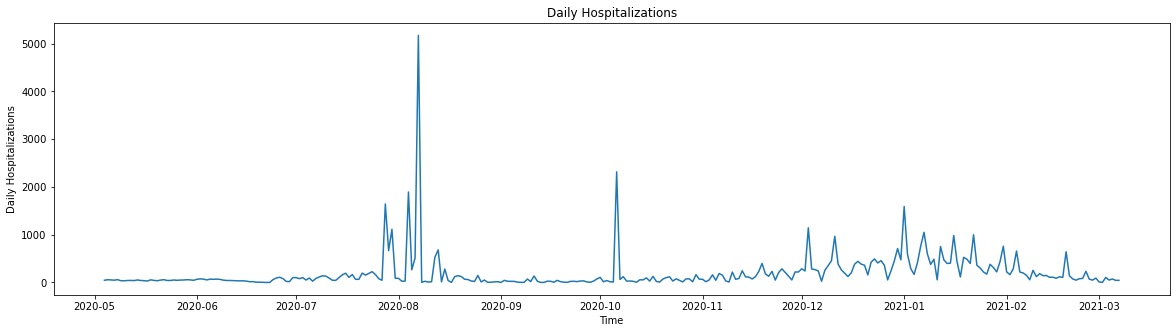

In [7]:
plt.figure(figsize = (20,5))
plot_f(train_df)

In [8]:
train_df['hospitalizedIncrease'].describe()

count     308.000000
mean      197.207792
std       400.235691
min         0.000000
25%        36.750000
50%        75.000000
75%       218.000000
max      5173.000000
Name: hospitalizedIncrease, dtype: float64

# ARIMA Forecasting
    
    p = number of lag observations included in the model (lag order)
    d = number of times that the raw observations are differences (degree of differencing)
    q = size of moving average window (order of moving average)

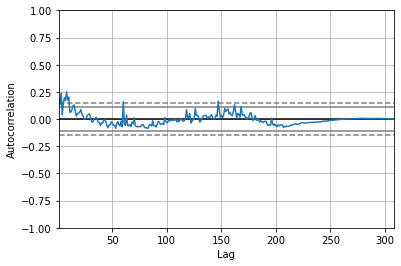

In [9]:
from pandas.plotting import autocorrelation_plot
from matplotlib import pyplot
from statsmodels.tsa.arima.model import ARIMA

autocorrelation_plot(train_df['hospitalizedIncrease'])
pyplot.show()

# q value will be around 10 based on the ACF

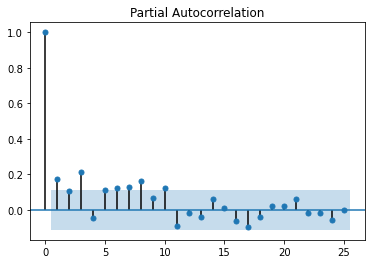

In [10]:
plot_pacf(train_df['hospitalizedIncrease'])
plt.show()

# p value of 7 from the PACF

In [11]:
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return np.array(diff)


In [12]:
def inverse_difference(history, yhat, interval=1):
	return yhat + history[-interval]


In [13]:
# ARIMA Model
model = ARIMA(train_df['hospitalizedIncrease'], order = (3 , 2,9))
model_fit = model.fit()
forecast = model_fit.forecast(steps = 7)



ARIMA_RMSE = sqrt(mean_squared_error(test_series, forecast))



warnings.filterwarnings("ignore")
print(model_fit.summary())
print(ARIMA_RMSE)

/Users/nickseah/Desktop/PythonAddOns/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/Users/nickseah/Desktop/PythonAddOns/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/Users/nickseah/Desktop/PythonAddOns/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/Users/nickseah/Desktop/PythonAddOns/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as st

                                SARIMAX Results                                 
Dep. Variable:     hospitalizedIncrease   No. Observations:                  308
Model:                   ARIMA(3, 2, 9)   Log Likelihood               -2254.291
Date:                  Sun, 18 Apr 2021   AIC                           4534.583
Time:                          10:08:23   BIC                           4582.989
Sample:                               0   HQIC                          4553.942
                                  - 308                                         
Covariance Type:                    opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -2.1022      0.304     -6.917      0.000      -2.698      -1.506
ar.L2         -2.0177      0.420     -4.803      0.000      -2.841      -1.194
ar.L3         -0.7949      0.280    

/Users/nickseah/Desktop/PythonAddOns/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/Users/nickseah/Desktop/PythonAddOns/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:580: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


In [14]:

# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(X, arima_order):
    model = ARIMA(X['hospitalizedIncrease'], order = arima_order)
    model_fit = model.fit()
    forecast = model_fit.forecast(steps = 7)



    ARIMA_RMSE = sqrt(mean_squared_error(test_series, forecast))
    return ARIMA_RMSE


In [15]:
order = (10,1,7)
evaluate_arima_model(train_df, order)

27.987589629473234

In [16]:
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset[:308]
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(dataset, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

# Grid Search Hyper Parameters for ARIMA

In [17]:
p_values = [0, 1, 2,3, 4,5, 6,7, 8,9, 10]
d_values = range(0, 3)
q_values = range(0, 10)
warnings.filterwarnings("ignore")
evaluate_models(train_df, p_values,d_values,q_values)

ARIMA(0, 0, 0) RMSE=143.213
ARIMA(0, 0, 1) RMSE=140.772
ARIMA(0, 0, 2) RMSE=138.800
ARIMA(0, 0, 3) RMSE=131.694
ARIMA(0, 0, 4) RMSE=132.590
ARIMA(0, 0, 5) RMSE=131.334
ARIMA(0, 0, 6) RMSE=123.296
ARIMA(0, 0, 7) RMSE=119.132
ARIMA(0, 0, 8) RMSE=107.564
ARIMA(0, 0, 9) RMSE=100.982
ARIMA(0, 1, 0) RMSE=17.901
ARIMA(0, 1, 1) RMSE=38.837
ARIMA(0, 1, 2) RMSE=38.034
ARIMA(0, 1, 3) RMSE=28.399
ARIMA(0, 1, 4) RMSE=47.737
ARIMA(0, 1, 5) RMSE=16.470
ARIMA(0, 1, 6) RMSE=12.767
ARIMA(0, 1, 7) RMSE=15.789
ARIMA(0, 1, 8) RMSE=13.776
ARIMA(0, 1, 9) RMSE=24.464
ARIMA(0, 2, 0) RMSE=17.901
ARIMA(0, 2, 1) RMSE=17.879
ARIMA(0, 2, 2) RMSE=37.193
ARIMA(0, 2, 3) RMSE=35.953
ARIMA(0, 2, 4) RMSE=26.491
ARIMA(0, 2, 5) RMSE=42.848
ARIMA(0, 2, 6) RMSE=14.442
ARIMA(0, 2, 7) RMSE=12.419
ARIMA(0, 2, 8) RMSE=13.791
ARIMA(0, 2, 9) RMSE=12.352
ARIMA(1, 0, 0) RMSE=139.365
ARIMA(1, 0, 1) RMSE=72.498
ARIMA(1, 0, 2) RMSE=71.370
ARIMA(1, 0, 3) RMSE=65.726
ARIMA(1, 0, 4) RMSE=73.663
ARIMA(1, 0, 5) RMSE=55.073
ARIMA(1, 0, 6) RM

# Best ARIMA (3, 2, 9) RMSE = 11.820

In [18]:
# ARMA Forecast
ARMA_model = ARIMA(train_df['hospitalizedIncrease'], order = (3 , 0,5))
ARMA_model_fit = ARMA_model.fit()

ARMA_forecast = ARMA_model_fit.forecast(steps = 7)

ARMA_RMSE = sqrt(mean_squared_error(test_series,ARMA_forecast))

warnings.filterwarnings("ignore")

print(ARMA_model_fit.summary())
print('ARMA RMSE:' + str(ARMA_RMSE))

                                SARIMAX Results                                 
Dep. Variable:     hospitalizedIncrease   No. Observations:                  308
Model:                   ARIMA(3, 0, 5)   Log Likelihood               -2258.051
Date:                  Sun, 18 Apr 2021   AIC                           4536.103
Time:                          10:13:36   BIC                           4573.404
Sample:                               0   HQIC                          4551.017
                                  - 308                                         
Covariance Type:                    opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        197.0873    137.612      1.432      0.152     -72.626     466.801
ar.L1          1.8648      0.279      6.672      0.000       1.317       2.413
ar.L2         -1.3061      0.569    

In [19]:
# evaluate an ARMA model for a given order (p,d,q)
def evaluate_arma_model(X, arima_order):
    model = ARIMA(X['hospitalizedIncrease'], order = arima_order)
    model_fit = model.fit()
    forecast = model_fit.forecast(steps = 7)



    ARMA_RMSE = sqrt(mean_squared_error(test_series, forecast))
    return ARMA_RMSE


In [20]:
def evaluate_arma_models(dataset, p_values, d_values, q_values):
    dataset = dataset[:308]
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arma_model(dataset, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARMA%s RMSE=%.3f' % (order,rmse))
                except:
                    continue
    print('Best ARMA%s RMSE=%.3f' % (best_cfg, best_score))

# Grid Search Hyper Parameters for ARMA

In [21]:
p_values = [0, 1, 2,3, 4,5, 6,7, 8,9, 10]
d_values = range(0,1)
q_values = range(0, 10)
warnings.filterwarnings("ignore")
evaluate_arma_models(train_df, p_values,d_values,q_values)

ARMA(0, 0, 0) RMSE=143.213
ARMA(0, 0, 1) RMSE=140.772
ARMA(0, 0, 2) RMSE=138.800
ARMA(0, 0, 3) RMSE=131.694
ARMA(0, 0, 4) RMSE=132.590
ARMA(0, 0, 5) RMSE=131.334
ARMA(0, 0, 6) RMSE=123.296
ARMA(0, 0, 7) RMSE=119.132
ARMA(0, 0, 8) RMSE=107.564
ARMA(0, 0, 9) RMSE=100.982
ARMA(1, 0, 0) RMSE=139.365
ARMA(1, 0, 1) RMSE=72.498
ARMA(1, 0, 2) RMSE=71.370
ARMA(1, 0, 3) RMSE=65.726
ARMA(1, 0, 4) RMSE=73.663
ARMA(1, 0, 5) RMSE=55.073
ARMA(1, 0, 6) RMSE=51.153
ARMA(1, 0, 7) RMSE=51.326
ARMA(1, 0, 8) RMSE=57.729
ARMA(1, 0, 9) RMSE=51.161
ARMA(2, 0, 0) RMSE=134.104
ARMA(2, 0, 1) RMSE=71.539
ARMA(2, 0, 2) RMSE=74.703
ARMA(2, 0, 3) RMSE=68.445
ARMA(2, 0, 4) RMSE=73.728
ARMA(2, 0, 5) RMSE=50.697
ARMA(2, 0, 6) RMSE=52.131
ARMA(2, 0, 7) RMSE=51.554
ARMA(2, 0, 8) RMSE=50.772
ARMA(2, 0, 9) RMSE=51.069
ARMA(3, 0, 0) RMSE=116.782
ARMA(3, 0, 1) RMSE=122.615
ARMA(3, 0, 2) RMSE=68.574
ARMA(3, 0, 3) RMSE=72.208
ARMA(3, 0, 4) RMSE=69.658
ARMA(3, 0, 5) RMSE=47.844
ARMA(3, 0, 6) RMSE=50.608
ARMA(3, 0, 7) RMSE=52.00

# Best ARMA(3,0,5) RMSE = 47.844

In [22]:
# ARMA Forecast
ARMA_forecast

308     84.453796
309     80.008303
310     86.705018
311     98.936230
312    102.426015
313    105.608586
314    111.767311
dtype: float64

In [23]:
# ARIMA Forecast
forecast

308    45.261065
309    64.177374
310    54.058798
311    49.250517
312    56.208922
313    45.713801
314    43.721982
dtype: float64

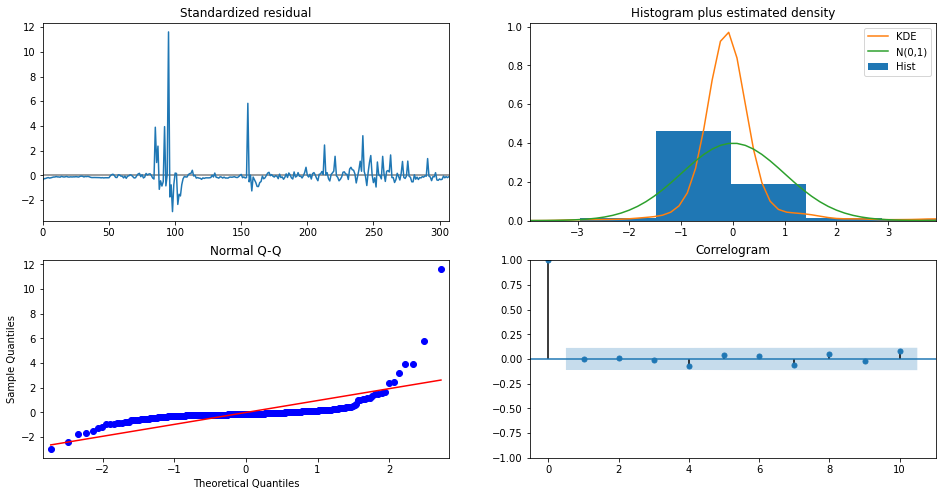

In [24]:
# ARMA Plot Diagnostics
ARMA_model_fit.plot_diagnostics(figsize = (16,8))
plt.show()

In [ ]:
# Look into good assumptions

# Standard residual - normal behaviour, outliers

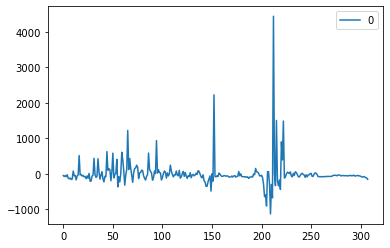

In [25]:
# ARMA line plot of residuals
ARMA_residuals = DataFrame(ARMA_model_fit.resid)
ARMA_residuals.plot()
pyplot.show()

# Residual plot is constant as we want

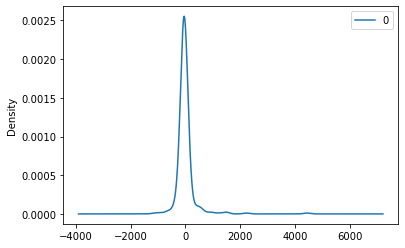

In [26]:
# ARMA Density plot of residuals
ARMA_residuals.plot(kind = 'kde')
pyplot.show()

# Plot indicates values are normally distributed

In [27]:
print(ARMA_residuals.describe())

                 0
count   308.000000
mean     -1.148013
std     369.332441
min   -1125.597728
25%     -82.959849
50%     -52.175677
75%      15.116215
max    4436.446954


In [28]:
# ARIMA Forecast
forecast = model_fit.forecast(steps = 7)
warnings.filterwarnings("ignore")

forecast

308    45.261065
309    64.177374
310    54.058798
311    49.250517
312    56.208922
313    45.713801
314    43.721982
dtype: float64

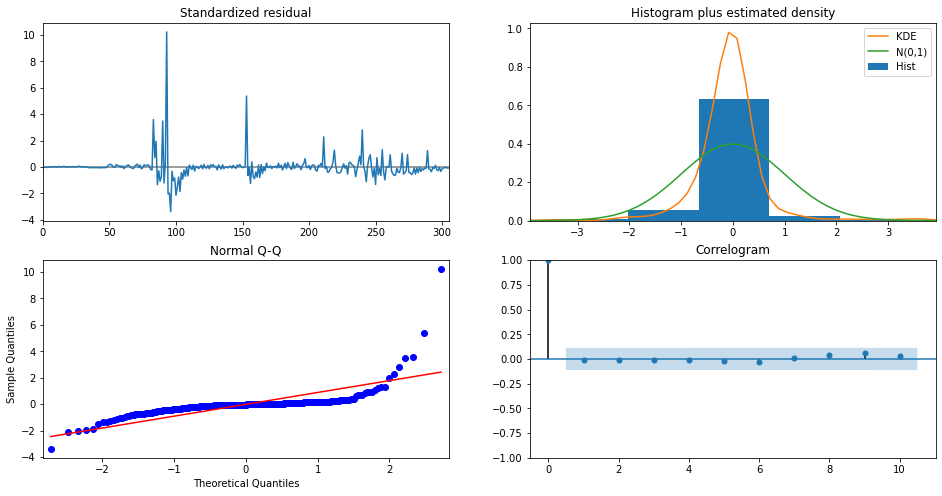

In [29]:
# ARIMA Plot Diagnostics
model_fit.plot_diagnostics(figsize = (16,8))
plt.show()

In [ ]:
# Correlogram Time Autocorrelation, typically autocorrelation is large when lag is small

In [ ]:
# Why there is noise in certain regions
# Maybe remove outliers, doing interpretation

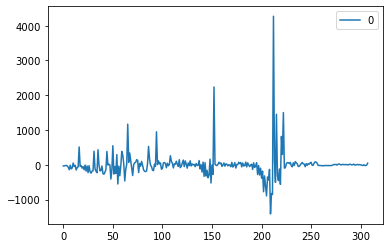

In [30]:
# line plot of residuals
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()

# Residual plot is constant as we want

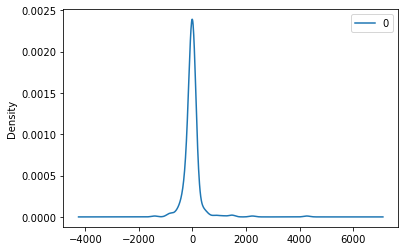

In [31]:
# Density plot of residuals
residuals.plot(kind = 'kde')
pyplot.show()

# Plot indicates values are normally distributed

In [32]:
print(residuals.describe())

                 0
count   308.000000
mean     -5.467820
std     373.606061
min   -1412.872770
25%     -79.276503
50%     -11.823746
75%      34.260574
max    4272.187800


# A non-zero mean in the residuals means that there is a bias in the prediction

In [33]:
# evaluate an ARIMA model using a walk-forward validation
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt


In [34]:
forecast = model_fit.forecast(steps = 7)
forecast

308    45.261065
309    64.177374
310    54.058798
311    49.250517
312    56.208922
313    45.713801
314    43.721982
dtype: float64

In [35]:
forecast = forecast.reset_index(drop = True)
forecast

0    45.261065
1    64.177374
2    54.058798
3    49.250517
4    56.208922
5    45.713801
6    43.721982
dtype: float64

In [36]:
ARMA_forecast = ARMA_forecast.reset_index(drop = True)
ARMA_forecast

0     84.453796
1     80.008303
2     86.705018
3     98.936230
4    102.426015
5    105.608586
6    111.767311
dtype: float64

In [37]:
sum(forecast)

358.3924599665569

In [38]:
sum(test_series)

383

In [39]:
sum(ARMA_forecast)

669.9052579456547

In [40]:
def mean_abs_perc_err(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# ARIMA MSE and MAPE

In [41]:
MSE = np.square(np.subtract(test_series, forecast)).mean()
ARIMA_RMSE = sqrt(mean_squared_error(test_series, forecast))

print('MSE: '+ str(MSE))
print("Mean Absolute % Error (MAPE): ", mean_abs_perc_err(y_true = test_series, y_pred = forecast))
print('RMSE: ' + str(ARIMA_RMSE))

MSE: 139.71886062441445
Mean Absolute % Error (MAPE):  17.536392984164873
RMSE: 11.820273288905568


# ARMA Error Statistics

In [42]:
ARMA_MSE = np.square(np.subtract(test_series, ARMA_forecast)).mean()
ARMA_RMSE = sqrt(mean_squared_error(test_series,ARMA_forecast))
print('MSE: '+ str(ARMA_MSE))
print("Mean Absolute % Error (MAPE): ", mean_abs_perc_err(y_true = test_series, y_pred = ARMA_forecast))
print('RMSE: ' + str(ARMA_RMSE))

MSE: 2289.0811715364134
Mean Absolute % Error (MAPE):  93.56635845845334
RMSE: 47.844343150851316


# The ARIMA model performs significantly better than the ARMA model with a RMSE of 11.8 compared to 47.8